# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 9</span>

Lo scopo di questo esercizio è quello di risolvere il problema del commesso viaggiatore: date un elenco di 
$N$ città nelle posizioni $\vec{c}_i$ ci si chiede quale sia il percorso chiuso che minimizzi la lunghezza totale  che viene misurata tramite la norma 
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
Per rappresentare la situazione ho preferito numerare le città con valori interi e quindi un percorso è definito da un array di dimensione N che contiene una permutazione della lista delle città.

Questo tipo di problemi si può risolvere agevolmente grazie ad un algoritmo genetico in cui la popolazione è rappresentata da array $1D$ che contengono le permutazioni. 

L'algoritmo genetico parte da un popolazione, nel nostro caso costituita da $100$ individui ed a ogni step tramite un selettore sceglie $100$ coppie (un singolo individuo può essere scelto più di una volta).  
In questo caso specifico il selezionatore è dato da $j= int(N\times r^p)$, dal momento che la popolazione è sempre ordinata per lunghezza del percorso crescente si va a favorire l'accoppiamento tra individui che hanno la soluzione migliore (lunghezza più piccola).

La formazione del nuovo individuo avviene tramite crossover ovvero tramite uno scambio di materiale genetico tra i due genitori: una volta fatta una copia dei due si considera un genitore e un punto scelto casualmente nell'array oltre il quale l'ordine delle città è quello con la quale compaiono nel secondo genitore.

inoltre sono anche presenti le mutazioni che permettono all'algoritmo di esplorare più configurazioni possibili, in questo caso sono:
- permutazione tra due città
- traslazione di un blocco di lunghezza $l$ di $n$ posizioni 
- inversione delle città appartenenti ad un dato blocco di lungheza $l$

Le probabilità di permutazione sono del $10\%$ mentre le probabilità di crossover sono del $70\%$. In tutti questi processi si è deciso di lasciare inalterata la prima città per ogni individuo (che in questo caso corrisponde alla numero $1$) poichè questo non influisce sulla soluzione.

Di seguito sono riportate le soluzioni dell'algoritmo genetico nel caso in cui $32$ città si trovino lungo una circonferenza e nel caso in cui siano scelte a caso all'interno di un quadrato. Per fissare quando l'algoritmo doveva arrestarsi si è prima trovata una stima grossolana di quanto doveva essere lungo il percorso e si è fatto girare l'algoritmo fino a quando non si trovava che la permutazione del primo individuo della popolazione, che ha la lunghezza totale più piccola, è un valore minore, a quel punto si procedeva ad abbassare il limite di arresto al nuovo valore trovato, questo è stato fatto fino a quando non si è trovata la soluzione che ci si aspettava oppure quando l'algoritmo impiegava troppo tempo a trovare una soluzione migliore.

Oltre a riportare graficamente la soluzione trovata vi è un grafico della lunghezza totale del cammino migliore tra tutti gli individui della popolazione (quindi il primo) per ogni generazione e della media dei cammini dei primi $N/2$ individui sempre in funzione delle singole generazioni.

Nel caso della circonferenza si osserva che una soluzione con una lunghezza molto vicina al valore minimo si è trovata prima dei $2500$ generazioni ma andando ad osservare la figura aveva ancora qualche piccola criticità.

### Cerchio

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics as stat 
import array as arr

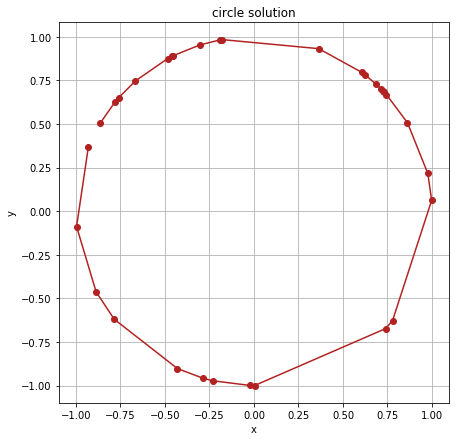

In [14]:
x,y = np.loadtxt("solution_c.dat", usecols=(0,1),unpack='true')
fig=plt.figure(figsize=(7,7))

plt.plot(x, y, marker='o', color="firebrick")

plt.title('circle solution')
plt.xlabel('x')
plt.ylabel('y')



plt.grid(True)
plt.show()

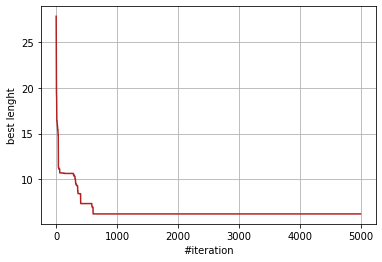

In [15]:
x,best = np.loadtxt("best_c.dat", usecols=(0,1),unpack='true')
plt.plot(x,best, color="firebrick")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('best lenght')
plt.show()

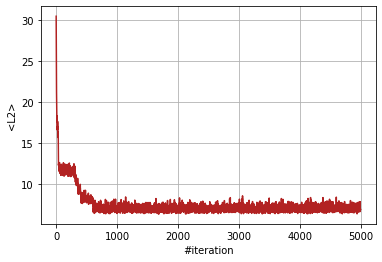

In [25]:
x,average = np.loadtxt("average_c.dat", usecols=(0,1),unpack='true')
plt.plot(x,average, color="firebrick")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('<L2>')
plt.show()

### Quadrato

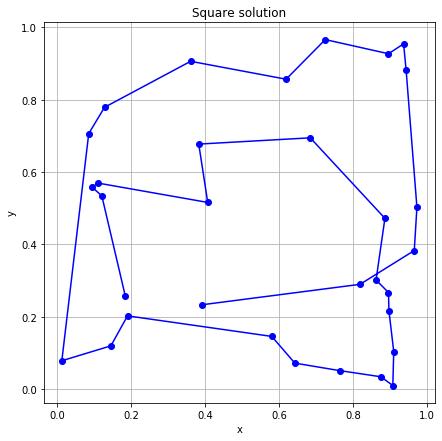

In [22]:
x,y = np.loadtxt("solution_s.dat", usecols=(0,1),unpack='true')
fig=plt.figure(figsize=(7,7))

plt.plot(x, y, marker='o', color="blue")


plt.title("Square solution")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

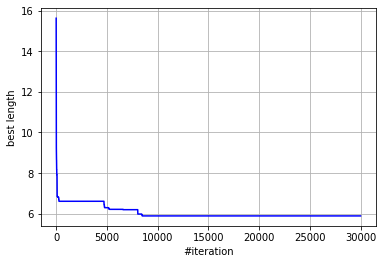

In [23]:
x,best = np.loadtxt("best_s.dat", usecols=(0,1),unpack='true')
plt.plot(x,best, color="blue")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('best length')
plt.show()

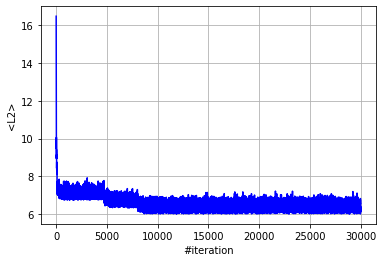

In [24]:
x,average = np.loadtxt("average_s.dat", usecols=(0,1),unpack='true')
plt.plot(x,average, color="blue")
plt.grid(True)
plt.xlabel('#iteration')
plt.ylabel('<L2>')
plt.show()